# NBA Machine Learning Project
#### WGU C964 Project
#### By: Nikolas Butalid

## Data
### 4 Datasets are being used:
* Advanced stats from 2000-2020
* Salaries from 2000-2020
* Statistic totals from 2000-2020
* Per 100 stats from 2000-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)

## Advanced Stats from 2000 to 2020
from: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Advanced.csv

#### Data Dictionary
More info on included stats on https://www.basketball-reference.com/about/glossary.html

* season: Season played
* player: Player name
* per: Player Efficiency Rating
* ts_percent: True shooting percentage
* x3p_ar: 3-Point Attempt Rate
* f_tr: Free Throw Attempt Rate
* orb_percent: Offensive Rebound Percentage
* drb_percent: Defensive Rebound Percentage
* trb_percent: Total Rebound Percentage
* ast_percent: Assist Percentage
* stl_percent: Steal Percentage
* blk_percent: Block Percentage
* tov_percent: Turnover Percentage
* usg_percent: Usage Percentage
* ows: Offensive Win Shares
* dws: Defensive Win Shares
* ws: Win Shares
* ws_48: Win Shares Per 48 Minutes
* obpm: Offensive Box/Plus Minus 
* dbpm: Offensive Box/Plus Minus
* bpm: Box/Plus Minus
* vorp: Value Over Replacement Player

In [2]:
advanced_df = pd.read_csv("data/data_since_1947/Advanced.csv")
col_li = ['player', 'season', 'tm']
col_li += list(advanced_df.columns[12:])
adv_df = advanced_df[[x for x in advanced_df if x in col_li]]
filtered_adv_df = adv_df[(adv_df['season'] >= 2000) & (adv_df['season'] <= 2020)]
filtered_adv_df.to_csv("user_data/advanced_data_2000-2020.csv", index=False)
filtered_adv_df.head()

,season,player,tm,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
1517,2020,Aaron Gordon,ORL,15.1,0.516,0.309,0.292,5.5,20.3,12.7,17.4,1.2,1.7,10.4,20.7,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0
1518,2020,Aaron Holiday,IND,11.6,0.521,0.393,0.155,1.5,9.0,5.3,19.1,1.7,0.9,12.8,18.7,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2
1519,2020,Abdel Nader,OKC,11.3,0.591,0.487,0.251,1.8,10.6,6.4,6.4,1.3,2.0,12.8,17.0,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2
1520,2020,Adam Mokoka,CHI,8.2,0.538,0.536,0.143,6.6,3.1,4.9,5.0,1.7,0.0,6.3,12.1,0.1,0.1,0.2,0.073,-3.1,-1.0,-4.1,-0.1
1521,2020,Admiral Schofield,WAS,6.1,0.502,0.663,0.163,2.0,12.4,7.0,5.3,1.0,0.9,6.6,11.9,0.1,0.1,0.1,0.017,-4.3,-1.2,-5.5,-0.3


## Salaries from 2000 to 2020
from: https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv

#### Data Dictionary
* player: Player Name
* salary: Salary for the season
* season: Season played

In [3]:
salary_df = pd.read_csv("data/nba-salaries.csv")
salary_df = salary_df.loc[:, ['name', 'salary', 'season']]
salary_df['player'] = salary_df['name']
salary_df.drop('name', axis=1,inplace=True)
salary_df.head()

,salary,season,player
0,17142000,2000,Shaquille O'Neal
1,16806000,2000,Kevin Garnett
2,15004000,2000,Alonzo Mourning
3,15000000,2000,Juwan Howard
4,14795000,2000,Scottie Pippen


## Per 100 Stats from 2000 to 2020
from: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Advanced.csv

#### Data Dictionary
More info on included stats on https://www.basketball-reference.com/about/glossary.html

* season: Season played
* player: Player name
* g: Games played
* gs: Games started
* mp: Minutes played
* fg_per_100_poss: Field Goals per 100 Team Possessions
* fga_per_100_poss: Field Goal Attempts per 100 Team Possessions
* fg_percent: Field Goal Percentage
* x3p_per_100_poss: 3-Point Field Goals per 100 Team Possessions
* x3pa_per_100_poss: 3-Point Field Goal Attempts per 100 Team Possessions
* x3p_percent: 3-Point Field Goal Percentage
* x2p_per_100_poss: 2-Point Field Goals per 100 Team Possessions
* x2pa_per_100_poss: 2-Point Field Goal Attempts per 100 Team Possessions
* x2p_percent: 2-Point Field Goal Percentage
* ft_per_100_poss: Free Throws per 100 Team Possessions
* fta_per_100_poss: Free Throw Attempts per 100 Team Possessions
* ft_percent: Free Throw Percentage
* orb_per_100_poss: Offensive Rebounds per 100 Team Possessions
* drb_per_100_poss: Defensive Rebounds per 100 Team Possessions
* trb_per_100_poss: Total Rebounds per 100 Team Possessions
* ast_per_100_poss: Assists per 100 Team Possessions
* stl_per_100_poss: Steals per 100 Team Possessions
* blk_per_100_poss: Blocks per 100 Team Possessions
* tov_per_100_poss: Turnovers per 100 Team Possessions
* pf_per_100_poss: Personal fouls per 100 Team Possessions
* pts_per_100_poss: Points per 100 Team Possessions
* o_rtg: Offensive Rating
* d_rtg: Defensive Rating

In [4]:
per100 = pd.read_csv("data/data_since_1947/Per 100 Poss.csv")
filtered_stats_df = per100[(per100['season'] >= 2000 ) & (per100['season'] <= 2020)]

stats_li = ['player', 'season', 'tm']
stats_li += list(filtered_stats_df.columns[10:])
per_100_df = filtered_stats_df[[x for x in filtered_stats_df if x in stats_li]]
per_100_df.to_csv("user_data/per_100_2000-2020", index=False)
per_100_df

,season,player,tm,g,gs,mp,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
1517,2020,Aaron Gordon,ORL,62,62.0,2017,8.1,18.5,0.437,1.8,5.7,0.308,6.3,12.8,0.494,3.6,5.4,0.674,2.6,8.9,11.5,5.5,1.2,0.9,2.4,3.0,21.6,107.0,110.0
1518,2020,Aaron Holiday,IND,66,33.0,1617,7.0,16.9,0.414,2.6,6.6,0.394,4.4,10.3,0.427,2.2,2.6,0.851,0.7,4.0,4.7,6.8,1.7,0.5,2.6,3.6,18.8,104.0,110.0
1519,2020,Abdel Nader,OKC,55,6.0,867,6.9,14.7,0.468,2.7,7.2,0.375,4.2,7.6,0.556,2.9,3.7,0.773,0.8,4.8,5.6,2.1,1.3,1.1,2.4,4.4,19.3,107.0,111.0
1520,2020,Adam Mokoka,CHI,11,0.0,112,5.2,12.0,0.429,2.6,6.5,0.400,2.6,5.6,0.462,0.9,1.7,0.500,3.0,1.3,4.3,1.7,1.7,0.0,0.9,7.3,13.8,115.0,114.0
1521,2020,Admiral Schofield,WAS,33,2.0,368,4.4,11.7,0.380,2.4,7.7,0.311,2.0,3.9,0.516,1.3,1.9,0.667,0.9,5.1,6.0,1.9,1.0,0.5,0.9,6.4,12.6,104.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13739,2000,Wayne Turner,BOS,3,0.0,41,1.2,7.4,0.167,0.0,0.0,NaN,1.2,7.4,0.167,2.5,7.4,0.333,1.2,2.5,3.7,6.2,0.0,0.0,3.7,5.0,5.0,60.0,113.0
13740,2000,Wesley Person,CLE,79,38.0,2056,6.8,16.0,0.428,2.6,6.1,0.424,4.2,9.9,0.431,1.5,1.9,0.792,1.1,5.4,6.5,3.6,1.0,0.5,1.5,2.9,17.7,108.0,107.0
13741,2000,Will Perdue,CHI,67,15.0,1012,3.1,8.9,0.351,0.0,0.0,NaN,3.1,8.9,0.351,2.7,5.6,0.476,4.7,9.2,13.9,3.4,0.7,2.2,4.1,6.7,8.9,78.0,104.0
13742,2000,William Avery,MIN,59,1.0,484,6.1,19.6,0.309,1.9,6.8,0.286,4.1,12.8,0.322,2.6,3.9,0.667,0.9,3.5,4.3,9.5,1.5,0.2,4.5,6.5,16.6,84.0,107.0


## Stat totals from 2000 to 2020
from: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Advanced.csv

#### Data Dictionary
More info on included stats on https://www.basketball-reference.com/about/glossary.html

***These statistics are the totals throughout the given year***

* season: Season played
* player: Player name
* mp: Minutes played
* fg: Total Field Goals
* fga: Total Field Goal Attempts
* fg_percent: Field Goal Percentage
* x3p: Total 3-Point Field Goals
* x3pa: Total 3-Point Field Goal Attempts
* x3p_percent: 3-Point Field Goal Percentage
* x2p: 2-Point Field Goals
* x2pa: 2-Point Field Goal Attempts
* x2p_percent: 2-Point Field Goal Percentage
* e_fg_percent: Effective Field Goal Percentage
* ft: Total Free Throws
* fta: Total Free Throw Attempts
* ft_percent: Free Throw Percentage
* orb: Total Offensive Rebounds
* drb: Total Defensive Rebounds
* trb: Total Rebounds
* ast: Total Assists
* stl: Total Steals
* blk: Total Blocks
* tov: Total Turnovers
* pf: Total Personal Fouls
* pts: Total Points

In [5]:
totals = pd.read_csv("data/data_since_1947/Player Totals.csv")
totals_li = ['player', 'season', 'tm']
totals_li += list(totals.columns[12:])
totals_df = totals[[x for x in totals if x in totals_li]]
total_df_filtered = totals_df[(totals_df['season'] >= 2000) & (totals_df['season'] <= 2020)]
total_df_filtered.to_csv("user_data/totals_2000-2020", index=False)
total_df_filtered

,season,player,tm,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
1517,2020,Aaron Gordon,ORL,2017.0,335.0,767.0,0.437,73.0,237.0,0.308,262.0,530.0,0.494,0.484,151.0,224.0,0.674,107.0,368.0,475.0,228.0,51.0,39.0,100.0,125.0,894.0
1518,2020,Aaron Holiday,IND,1617.0,233.0,563.0,0.414,87.0,221.0,0.394,146.0,342.0,0.427,0.491,74.0,87.0,0.851,22.0,134.0,156.0,225.0,55.0,16.0,88.0,120.0,627.0
1519,2020,Abdel Nader,OKC,867.0,123.0,263.0,0.468,48.0,128.0,0.375,75.0,135.0,0.556,0.559,51.0,66.0,0.773,14.0,86.0,100.0,38.0,23.0,20.0,43.0,78.0,345.0
1520,2020,Adam Mokoka,CHI,112.0,12.0,28.0,0.429,6.0,15.0,0.400,6.0,13.0,0.462,0.536,2.0,4.0,0.500,7.0,3.0,10.0,4.0,4.0,0.0,2.0,17.0,32.0
1521,2020,Admiral Schofield,WAS,368.0,35.0,92.0,0.380,19.0,61.0,0.311,16.0,31.0,0.516,0.484,10.0,15.0,0.667,7.0,40.0,47.0,15.0,8.0,4.0,7.0,50.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13739,2000,Wayne Turner,BOS,41.0,1.0,6.0,0.167,0.0,0.0,NaN,1.0,6.0,0.167,0.167,2.0,6.0,0.333,1.0,2.0,3.0,5.0,0.0,0.0,3.0,4.0,4.0
13740,2000,Wesley Person,CLE,2056.0,280.0,654.0,0.428,106.0,250.0,0.424,174.0,404.0,0.431,0.509,61.0,77.0,0.792,44.0,223.0,267.0,146.0,40.0,19.0,60.0,119.0,727.0
13741,2000,Will Perdue,CHI,1012.0,59.0,168.0,0.351,0.0,0.0,NaN,59.0,168.0,0.351,0.351,50.0,105.0,0.476,88.0,174.0,262.0,65.0,14.0,42.0,78.0,126.0,168.0
13742,2000,William Avery,MIN,484.0,56.0,181.0,0.309,18.0,63.0,0.286,38.0,118.0,0.322,0.359,24.0,36.0,0.667,8.0,32.0,40.0,88.0,14.0,2.0,42.0,60.0,154.0


## Combining the datasets into one

In [6]:
df_merged = pd.merge(total_df_filtered, per_100_df, how='inner', left_index=True,
                     right_index=True, suffixes=('', '_remove'))

df_merged = pd.merge(df_merged, filtered_adv_df, how='inner', left_index=True,
                     right_index=True, suffixes=('', '_remove'))

df_merged.drop([i for i in df_merged.columns if 'remove' in i],
               axis=1, inplace=True)
df_merged.head()

,season,player,tm,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,g,gs,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
1517,2020,Aaron Gordon,ORL,2017.0,335.0,767.0,0.437,73.0,237.0,0.308,262.0,530.0,0.494,0.484,151.0,224.0,0.674,107.0,368.0,475.0,228.0,51.0,39.0,100.0,125.0,894.0,62,62.0,8.1,18.5,1.8,5.7,6.3,12.8,3.6,5.4,2.6,8.9,11.5,5.5,1.2,0.9,2.4,3.0,21.6,107.0,110.0,15.1,0.516,0.309,0.292,5.5,20.3,12.7,17.4,1.2,1.7,10.4,20.7,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0
1518,2020,Aaron Holiday,IND,1617.0,233.0,563.0,0.414,87.0,221.0,0.394,146.0,342.0,0.427,0.491,74.0,87.0,0.851,22.0,134.0,156.0,225.0,55.0,16.0,88.0,120.0,627.0,66,33.0,7.0,16.9,2.6,6.6,4.4,10.3,2.2,2.6,0.7,4.0,4.7,6.8,1.7,0.5,2.6,3.6,18.8,104.0,110.0,11.6,0.521,0.393,0.155,1.5,9.0,5.3,19.1,1.7,0.9,12.8,18.7,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2
1519,2020,Abdel Nader,OKC,867.0,123.0,263.0,0.468,48.0,128.0,0.375,75.0,135.0,0.556,0.559,51.0,66.0,0.773,14.0,86.0,100.0,38.0,23.0,20.0,43.0,78.0,345.0,55,6.0,6.9,14.7,2.7,7.2,4.2,7.6,2.9,3.7,0.8,4.8,5.6,2.1,1.3,1.1,2.4,4.4,19.3,107.0,111.0,11.3,0.591,0.487,0.251,1.8,10.6,6.4,6.4,1.3,2.0,12.8,17.0,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2
1520,2020,Adam Mokoka,CHI,112.0,12.0,28.0,0.429,6.0,15.0,0.400,6.0,13.0,0.462,0.536,2.0,4.0,0.500,7.0,3.0,10.0,4.0,4.0,0.0,2.0,17.0,32.0,11,0.0,5.2,12.0,2.6,6.5,2.6,5.6,0.9,1.7,3.0,1.3,4.3,1.7,1.7,0.0,0.9,7.3,13.8,115.0,114.0,8.2,0.538,0.536,0.143,6.6,3.1,4.9,5.0,1.7,0.0,6.3,12.1,0.1,0.1,0.2,0.073,-3.1,-1.0,-4.1,-0.1
1521,2020,Admiral Schofield,WAS,368.0,35.0,92.0,0.380,19.0,61.0,0.311,16.0,31.0,0.516,0.484,10.0,15.0,0.667,7.0,40.0,47.0,15.0,8.0,4.0,7.0,50.0,99.0,33,2.0,4.4,11.7,2.4,7.7,2.0,3.9,1.3,1.9,0.9,5.1,6.0,1.9,1.0,0.5,0.9,6.4,12.6,104.0,118.0,6.1,0.502,0.663,0.163,2.0,12.4,7.0,5.3,1.0,0.9,6.6,11.9,0.1,0.1,0.1,0.017,-4.3,-1.2,-5.5,-0.3


## Combining the merged dataframe with the salary dataframe
For players without a recorded salary, their statistics will be dropped

In [7]:
final_df = pd.merge(df_merged, salary_df, on=('player', 'season'))
teams = {
    "ATL":"Atlanta Hawks",
    "BKN":"Brooklyn Nets",
    "BOS":"Boston Celtics",
    "CHA":"Charlotte Hornets",
    "CHI":"Chicago Bulls",
    "CLE":"Cleveland Cavaliers",
    "DAL":"Dallas Mavericks",
    "DEN":"Denver Nuggets",
    "DET":"Detroit Pistons",
    "GSW":"Golden State Warriors",
    "HOU":"Houston Rockets",
    "IND":"Indiana Pacers",
    "LAC":"Los Angeles Clippers",
    "LAL":"Los Angeles Lakers",
    "MEM":"Memphis Grizzlies",
    "MIA":"Miami Heat",
    "MIL":"Milwaukee Bucks",
    "MIN":"Minnesota Timberwolves",
    "NOP":"New Orleans Pelicans",
    "NYK":"New York Knicks",
    "OKC":"Oklahoma City Thunder",
    "ORL":"Orlando Magic",
    "PHI":"Philadelphia 76ers",
    "PHX":"Phoenix Suns",
    "POR":"Portland Trail Blazers",
    "SAC":"Sacramento Kings",
    "SAS":"San Antonio Spurs",
    "TOR":"Toronto Raptors",
    "UTA":"Utah Jazz",
    "WAS":"Washington Wizards",
    "BRK":"Brooklyn Nets",
    "CHH":"Charlotte Hornets",
    "CHO":"Charlotte Hornets",
    "NJN":"New Jersey Nets",
    "NOH":"New Orleans Hornets",
    "NOK":"New Orleans Hornets",
    "PHO":"Phoenix Suns",
    "SEA":"Seattle SuperSonics",
    "TOT":"Total",
    "VAN":"Vancouver Grizzlies"
}
tot_df = final_df[final_df['tm'] == 'TOT']
tot_df.head()

,season,player,tm,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,g,gs,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,salary
6,2020,Alec Burks,TOT,1754.0,321.0,768.0,0.418,116.0,301.0,0.385,205.0,467.0,0.439,0.493,235.0,265.0,0.887,48.0,234.0,282.0,189.0,62.0,17.0,91.0,128.0,993.0,66,19.0,8.8,21.0,3.2,8.2,5.6,12.8,6.4,7.2,1.3,6.4,7.7,5.2,1.7,0.5,2.5,3.5,27.2,112.0,114.0,16.7,0.561,0.392,0.345,2.9,14.9,8.7,17.2,1.7,0.9,9.3,23.8,2.5,1.2,3.7,0.101,1.2,-0.7,0.5,1.1,1620564
10,2020,Alex Len,TOT,970.0,177.0,319.0,0.555,16.0,59.0,0.271,161.0,260.0,0.619,0.580,68.0,105.0,0.648,100.0,221.0,321.0,50.0,23.0,48.0,55.0,127.0,438.0,55,12.0,8.6,15.5,0.8,2.9,7.8,12.6,3.3,5.1,4.8,10.7,15.6,2.4,1.1,2.3,2.7,6.2,21.2,116.0,111.0,17.7,0.600,0.185,0.329,11.1,25.2,18.0,7.9,1.1,4.3,13.1,18.1,1.5,1.0,2.5,0.122,-0.5,-0.3,-0.7,0.3,4160000
15,2020,Allen Crabbe,TOT,653.0,63.0,177.0,0.356,36.0,119.0,0.303,27.0,58.0,0.466,0.458,10.0,14.0,0.714,11.0,66.0,77.0,33.0,15.0,4.0,17.0,47.0,172.0,37,1.0,4.5,12.6,2.6,8.5,1.9,4.1,0.7,1.0,0.8,4.7,5.5,2.4,1.1,0.3,1.2,3.4,12.3,97.0,117.0,6.0,0.470,0.672,0.079,1.8,11.0,6.3,6.8,1.1,0.5,8.5,12.7,-0.2,0.2,-0.1,-0.007,-3.8,-1.5,-5.3,-0.5,18500000
20,2020,Andre Drummond,TOT,1879.0,418.0,784.0,0.533,5.0,35.0,0.143,413.0,749.0,0.551,0.536,169.0,294.0,0.575,250.0,614.0,864.0,152.0,109.0,93.0,203.0,201.0,1010.0,57,56.0,10.9,20.5,0.1,0.9,10.8,19.6,4.4,7.7,6.5,16.1,22.6,4.0,2.8,2.4,5.3,5.3,26.4,104.0,103.0,22.0,0.553,0.045,0.375,14.9,37.5,26.0,13.6,2.8,4.2,18.2,25.9,0.6,3.6,4.2,0.108,-0.1,1.1,0.9,1.4,27093019
25,2020,Andrew Wiggins,TOT,1858.0,437.0,978.0,0.447,111.0,334.0,0.332,326.0,644.0,0.506,0.504,190.0,268.0,0.709,66.0,208.0,274.0,198.0,45.0,53.0,132.0,127.0,1175.0,54,54.0,11.0,24.6,2.8,8.4,8.2,16.2,4.8,6.7,1.7,5.2,6.9,5.0,1.1,1.3,3.3,3.2,29.6,105.0,114.0,16.4,0.536,0.342,0.274,3.6,12.3,7.8,18.1,1.1,2.4,10.7,27.4,0.8,1.1,1.9,0.050,1.1,-1.4,-0.3,0.8,27504630


In [8]:
for i in tot_df.itertuples():
    final_df.drop(final_df[(final_df['season'] == i.season) & (final_df['player'] == i.player) * (final_df['tm'] != 'TOT')].index, inplace=True)
    
final_df

,season,player,tm,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,g,gs,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,salary
0,2020,Aaron Gordon,ORL,2017.0,335.0,767.0,0.437,73.0,237.0,0.308,262.0,530.0,0.494,0.484,151.0,224.0,0.674,107.0,368.0,475.0,228.0,51.0,39.0,100.0,125.0,894.0,62,62.0,8.1,18.5,1.8,5.7,6.3,12.8,3.6,5.4,2.6,8.9,11.5,5.5,1.2,0.9,2.4,3.0,21.6,107.0,110.0,15.1,0.516,0.309,0.292,5.5,20.3,12.7,17.4,1.2,1.7,10.4,20.7,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0,19863636
1,2020,Aaron Holiday,IND,1617.0,233.0,563.0,0.414,87.0,221.0,0.394,146.0,342.0,0.427,0.491,74.0,87.0,0.851,22.0,134.0,156.0,225.0,55.0,16.0,88.0,120.0,627.0,66,33.0,7.0,16.9,2.6,6.6,4.4,10.3,2.2,2.6,0.7,4.0,4.7,6.8,1.7,0.5,2.6,3.6,18.8,104.0,110.0,11.6,0.521,0.393,0.155,1.5,9.0,5.3,19.1,1.7,0.9,12.8,18.7,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2,2329200
2,2020,Abdel Nader,OKC,867.0,123.0,263.0,0.468,48.0,128.0,0.375,75.0,135.0,0.556,0.559,51.0,66.0,0.773,14.0,86.0,100.0,38.0,23.0,20.0,43.0,78.0,345.0,55,6.0,6.9,14.7,2.7,7.2,4.2,7.6,2.9,3.7,0.8,4.8,5.6,2.1,1.3,1.1,2.4,4.4,19.3,107.0,111.0,11.3,0.591,0.487,0.251,1.8,10.6,6.4,6.4,1.3,2.0,12.8,17.0,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2,1618520
3,2020,Admiral Schofield,WAS,368.0,35.0,92.0,0.380,19.0,61.0,0.311,16.0,31.0,0.516,0.484,10.0,15.0,0.667,7.0,40.0,47.0,15.0,8.0,4.0,7.0,50.0,99.0,33,2.0,4.4,11.7,2.4,7.7,2.0,3.9,1.3,1.9,0.9,5.1,6.0,1.9,1.0,0.5,0.9,6.4,12.6,104.0,118.0,6.1,0.502,0.663,0.163,2.0,12.4,7.0,5.3,1.0,0.9,6.6,11.9,0.1,0.1,0.1,0.017,-4.3,-1.2,-5.5,-0.3,1000000
4,2020,Al Horford,PHI,2025.0,319.0,709.0,0.450,99.0,283.0,0.350,220.0,426.0,0.516,0.520,61.0,80.0,0.763,103.0,353.0,456.0,270.0,52.0,61.0,80.0,142.0,798.0,67,61.0,7.6,17.0,2.4,6.8,5.3,10.2,1.5,1.9,2.5,8.4,10.9,6.5,1.2,1.5,1.9,3.4,19.1,115.0,109.0,15.7,0.536,0.399,0.113,5.6,19.3,12.4,19.2,1.2,2.6,9.7,17.5,2.8,2.6,5.4,0.128,1.3,1.0,2.2,2.2,28000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,2000,Vonteego Cummings,GSW,1793.0,265.0,655.0,0.405,49.0,151.0,0.325,216.0,504.0,0.429,0.442,127.0,169.0,0.751,57.0,127.0,184.0,247.0,91.0,13.0,132.0,174.0,706.0,75,11.0,7.4,18.4,1.4,4.2,6.1,14.1,3.6,4.7,1.6,3.6,5.2,6.9,2.6,0.4,3.7,4.9,19.8,99.0,109.0,12.9,0.484,0.231,0.258,3.1,7.9,5.4,22.6,2.6,0.5,15.3,20.2,0.7,0.7,1.3,0.036,-1.2,-0.5,-1.7,0.2,2600000
9534,2000,Wally Szczerbiak,MIN,2171.0,342.0,669.0,0.511,28.0,78.0,0.359,314.0,591.0,0.531,0.532,133.0,161.0,0.826,89.0,183.0,272.0,201.0,58.0,23.0,83.0,175.0,845.0,73,53.0,8.2,16.1,0.7,1.9,7.6,14.2,3.2,3.9,2.1,4.4,6.6,4.8,1.4,0.6,2.0,4.2,20.4,116.0,106.0,15.4,0.571,0.117,0.241,4.7,9.9,7.3,14.2,1.4,0.8,10.1,17.1,4.5,1.7,6.2,0.137,1.0,-0.1,0.9,1.6,2011000
9535,2000,Walt Williams,HOU,1859.0,312.0,681.0,0.458,102.0,261.0,0.391,210.0,420.0,0.500,0.533,101.0,123.0,0.821,69.0,237.0,306.0,157.0,49.0,44.0,113.0,190.0,827.0,76,66.0,8.6,18.7,2.8,7.2,5.8,11.5,2.8,3.4,1.9,6.5,8.4,4.3,1.3,1.2,3.1,5.2,22.7,109.0,106.0,15.6,0.562,0.383,0.181,4.3,14.0,9.2,14.3,1.3,1.5,13.3,20.0,3.0,1.4,4.4,0.114,1.4,-0.2,1.2,1.5,3750000
9536,2000,Walter McCarty,BOS,879.0,78.0,230.0,0.339,34.0,110.0,0.309,44.0,120.0,0.367,0.413,39.0,54.0,0.722,33.0,77.0,110.0,70.0,24.0,23.0,67.0,83.0,229.0,61,5.0,4.5,13.3,2.0,6.4,2.5,6.9,2.3,3.1,1.9,4.4,6.4,4.0,1.4,1.3,3.9,4.8,13.2,87.0,107.0,7.2,0.451,0.478,0.235,4.1,10.5,7.1,11.6,1.4,1.9,20.9,15.8

In [9]:
final_df.isna().sum()

season    0
player    0
tm        0
mp        0
fg        0
         ..
obpm      0
dbpm      0
bpm       0
vorp      0
salary    0
Length: 68, dtype: int64

In [10]:
final_df.fillna(0, inplace=True)

In [11]:
final_df.head()

,season,player,tm,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,g,gs,fg_per_100_poss,fga_per_100_poss,x3p_per_100_poss,x3pa_per_100_poss,x2p_per_100_poss,x2pa_per_100_poss,ft_per_100_poss,fta_per_100_poss,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,salary
0,2020,Aaron Gordon,ORL,2017.0,335.0,767.0,0.437,73.0,237.0,0.308,262.0,530.0,0.494,0.484,151.0,224.0,0.674,107.0,368.0,475.0,228.0,51.0,39.0,100.0,125.0,894.0,62,62.0,8.1,18.5,1.8,5.7,6.3,12.8,3.6,5.4,2.6,8.9,11.5,5.5,1.2,0.9,2.4,3.0,21.6,107.0,110.0,15.1,0.516,0.309,0.292,5.5,20.3,12.7,17.4,1.2,1.7,10.4,20.7,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0,19863636
1,2020,Aaron Holiday,IND,1617.0,233.0,563.0,0.414,87.0,221.0,0.394,146.0,342.0,0.427,0.491,74.0,87.0,0.851,22.0,134.0,156.0,225.0,55.0,16.0,88.0,120.0,627.0,66,33.0,7.0,16.9,2.6,6.6,4.4,10.3,2.2,2.6,0.7,4.0,4.7,6.8,1.7,0.5,2.6,3.6,18.8,104.0,110.0,11.6,0.521,0.393,0.155,1.5,9.0,5.3,19.1,1.7,0.9,12.8,18.7,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2,2329200
2,2020,Abdel Nader,OKC,867.0,123.0,263.0,0.468,48.0,128.0,0.375,75.0,135.0,0.556,0.559,51.0,66.0,0.773,14.0,86.0,100.0,38.0,23.0,20.0,43.0,78.0,345.0,55,6.0,6.9,14.7,2.7,7.2,4.2,7.6,2.9,3.7,0.8,4.8,5.6,2.1,1.3,1.1,2.4,4.4,19.3,107.0,111.0,11.3,0.591,0.487,0.251,1.8,10.6,6.4,6.4,1.3,2.0,12.8,17.0,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2,1618520
3,2020,Admiral Schofield,WAS,368.0,35.0,92.0,0.380,19.0,61.0,0.311,16.0,31.0,0.516,0.484,10.0,15.0,0.667,7.0,40.0,47.0,15.0,8.0,4.0,7.0,50.0,99.0,33,2.0,4.4,11.7,2.4,7.7,2.0,3.9,1.3,1.9,0.9,5.1,6.0,1.9,1.0,0.5,0.9,6.4,12.6,104.0,118.0,6.1,0.502,0.663,0.163,2.0,12.4,7.0,5.3,1.0,0.9,6.6,11.9,0.1,0.1,0.1,0.017,-4.3,-1.2,-5.5,-0.3,1000000
4,2020,Al Horford,PHI,2025.0,319.0,709.0,0.450,99.0,283.0,0.350,220.0,426.0,0.516,0.520,61.0,80.0,0.763,103.0,353.0,456.0,270.0,52.0,61.0,80.0,142.0,798.0,67,61.0,7.6,17.0,2.4,6.8,5.3,10.2,1.5,1.9,2.5,8.4,10.9,6.5,1.2,1.5,1.9,3.4,19.1,115.0,109.0,15.7,0.536,0.399,0.113,5.6,19.3,12.4,19.2,1.2,2.6,9.7,17.5,2.8,2.6,5.4,0.128,1.3,1.0,2.2,2.2,28000000


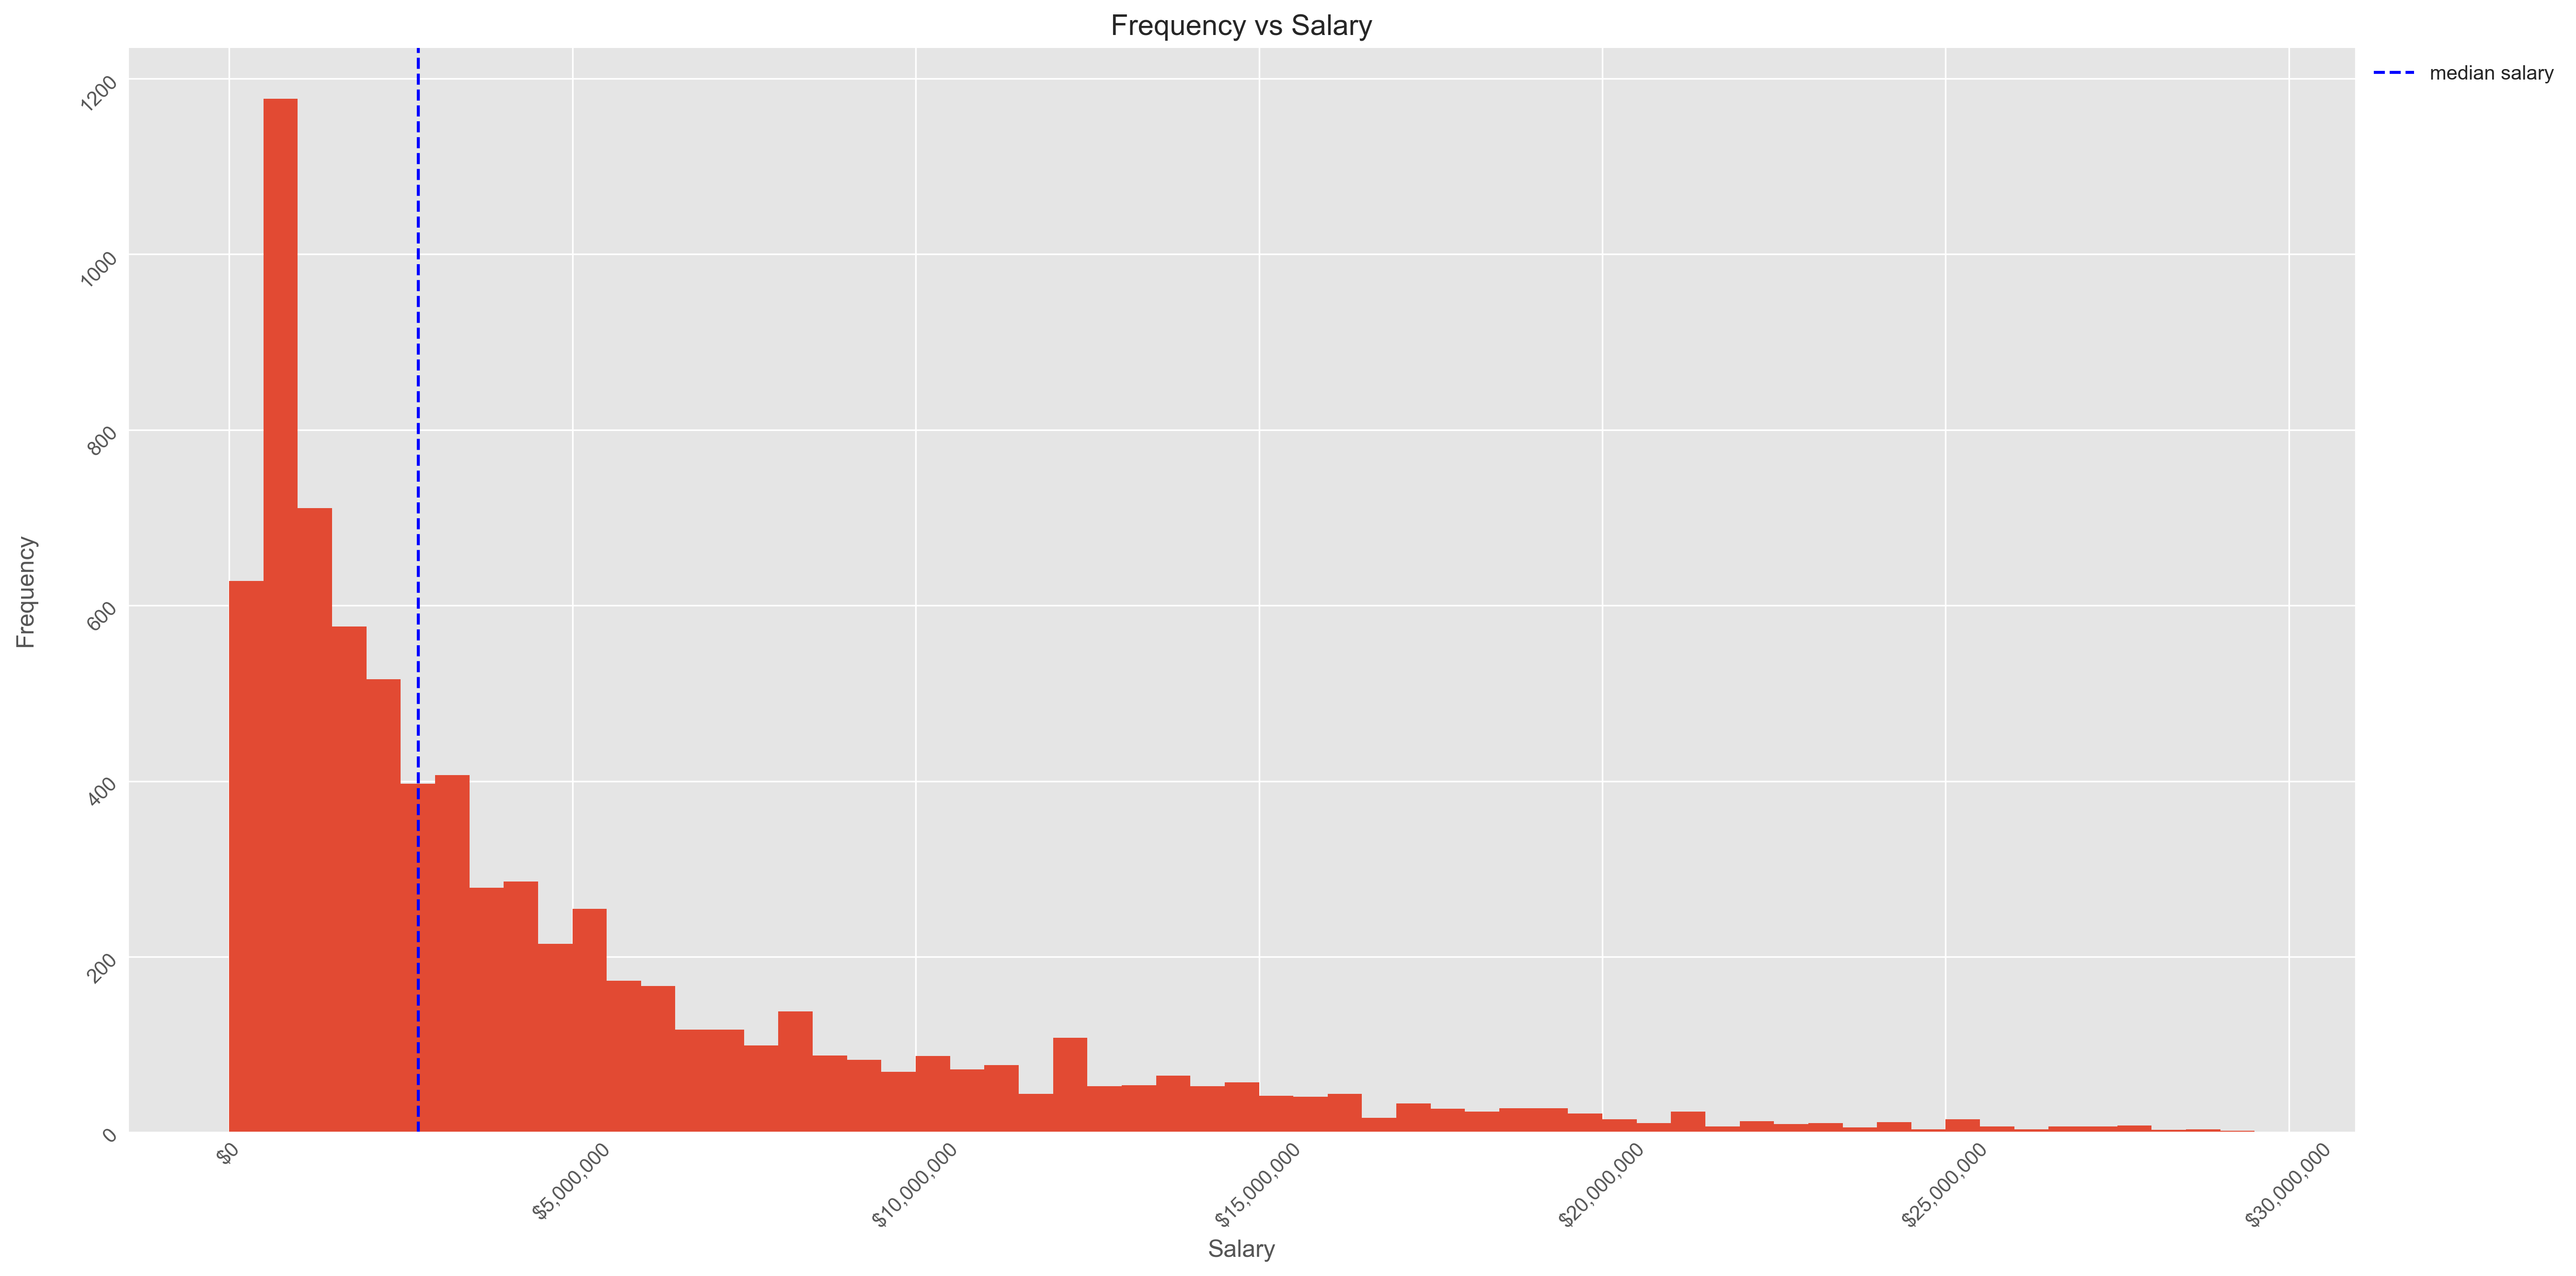

In [178]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(final_df['salary'], bins=np.arange(0, 30000000, 500000))
ax.set(xlabel='Salary',
       ylabel='Frequency',
       title = 'Frequency vs Salary')
ax.axvline(final_df['salary'].median(), ls='--', color='blue', label='median salary')
ax.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left');
plt.rcParams.update({'font.size': 20})

ax.tick_params(labelrotation=45)
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.labelpad = 20

## Begin to fit model

### Split data into train and test sets
Cross-validation will be used so no validation set is needed

In [13]:
copy_df = final_df

In [14]:
final_df = final_df[['mp', 'fg', 'fga', 'ft', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'g', 'gs', 'o_rtg', 'd_rtg', 'per', 'ows', 'dws', 'obpm', 'dbpm', 'bpm', 'vorp', 'salary']]

In [15]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = final_df.drop('salary', axis=1)
y = final_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

CPU times: total: 1.02 s
Wall time: 3.52 s


In [16]:
base_model = RandomForestRegressor(n_jobs=-1)
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)

0.4686742435261242

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

def show_scores(model):
    y_preds = model.predict(X_test)
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
              'MSE': mean_squared_error(y_test, y_preds),
              'R2': r2_score(y_test, y_preds),
              'MAPE': mean_absolute_percentage_error(y_test,y_preds)}
    return scores

show_scores(base_model)

{'MAE': 2888222.830577858,
 'MSE': 17626388983490.527,
 'R2': 0.4686742435261242,
 'MAPE': 2.0104570148144374}

In [18]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV
# np.random.seed(42)

# param_grid = {
#     'n_estimators': [500, 1000],
#     'max_depth': [None],
#     'min_samples_split': [1, 4, 10],
#     'min_samples_leaf': [1, 9, 20],
#     'max_features': ['auto']
# }

# rs_model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid,
#                                                     n_iter=15,
#                                                     cv=3,
#                                                     verbose=1)
# rs_model.fit(X_train, y_train)

In [19]:
# rs_model.best_params_

In [20]:
best_params = {'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [21]:
# show_scores(rs_model)

In [22]:
ideal_model = RandomForestRegressor(n_estimators=500,
                                    min_samples_split=4,
                                    min_samples_leaf=1,
                                    max_features='auto',
                                    max_depth=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=500)

In [23]:
ideal_model.score(X_test, y_test)

0.4741049736836698

In [24]:
show_scores(ideal_model)

{'MAE': 2885088.7337561925,
 'MSE': 17446228016221.518,
 'R2': 0.4741049736836698,
 'MAPE': 2.0111929826958854}

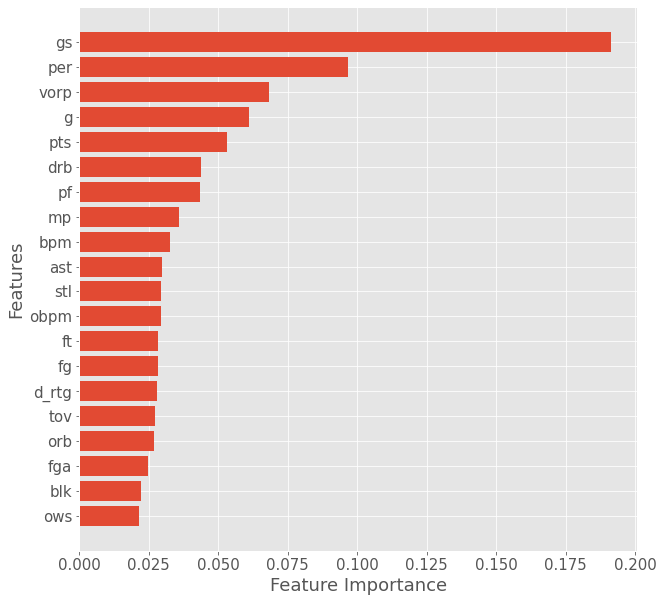

In [25]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    plt.rcParams.update({'font.size': 15})       
    fig, ax = plt.subplots(figsize=(10,10))
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()


plt.style.use('ggplot')
plot_features(X_train.columns, ideal_model.feature_importances_)

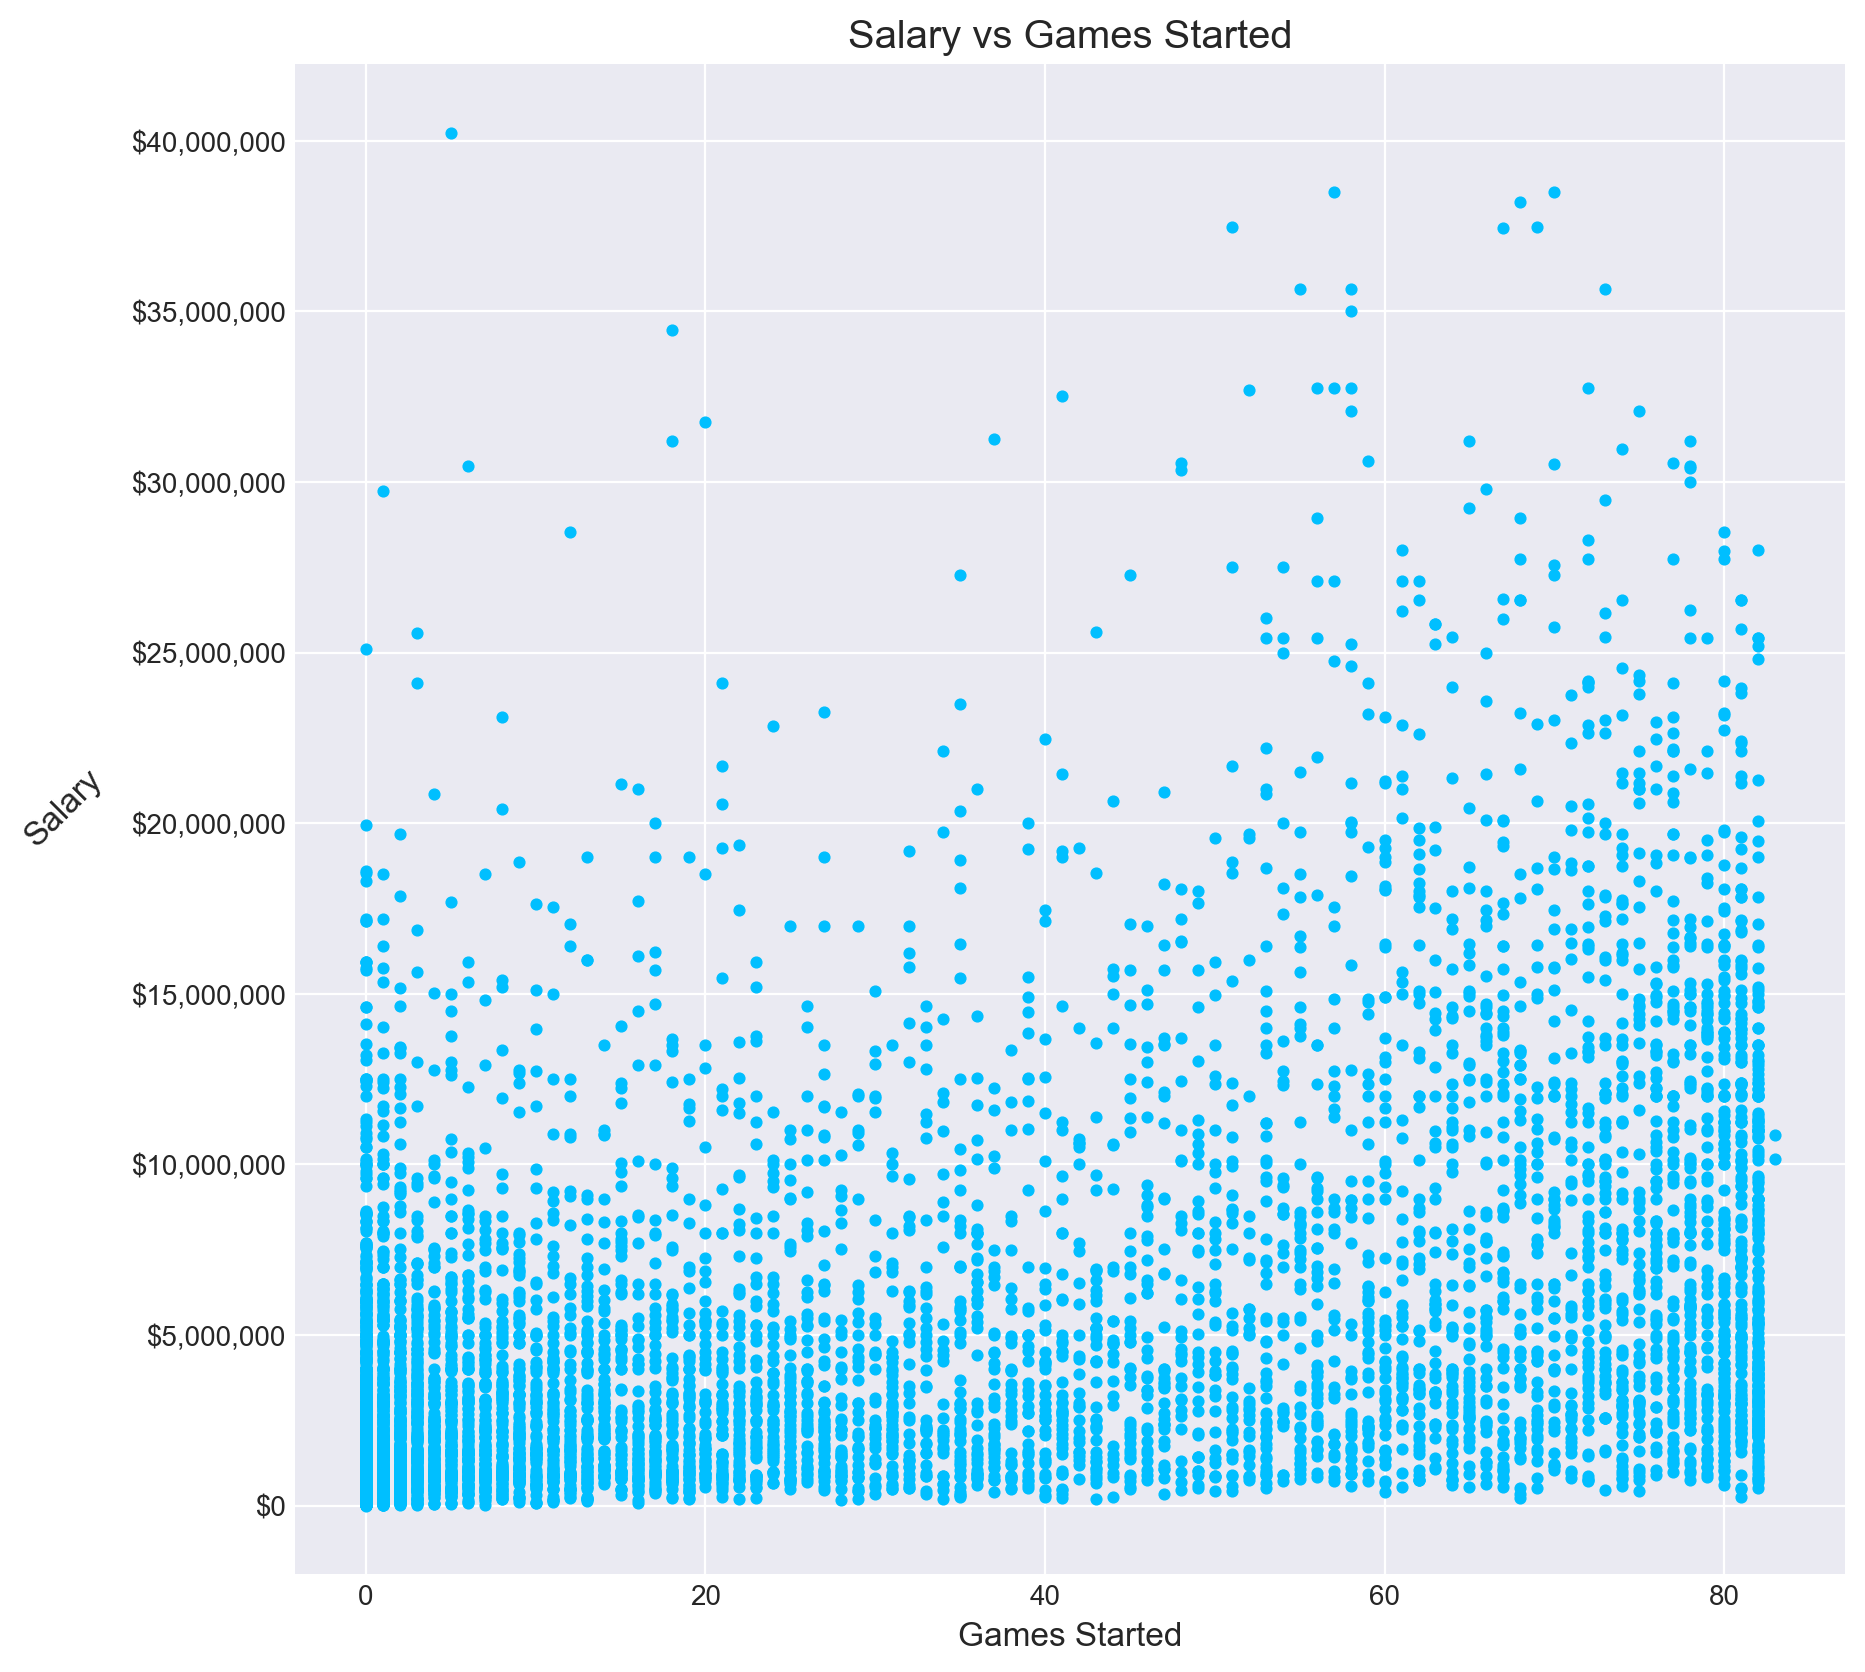

In [167]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(final_df['gs'], final_df['salary'], c='deepskyblue', s=15)
ax.set(xlabel='Games Started',
       ylabel='Salary',
       title='Salary vs Games Started')

ax.set_ylabel('Salary', rotation=45)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.labelpad = 20;

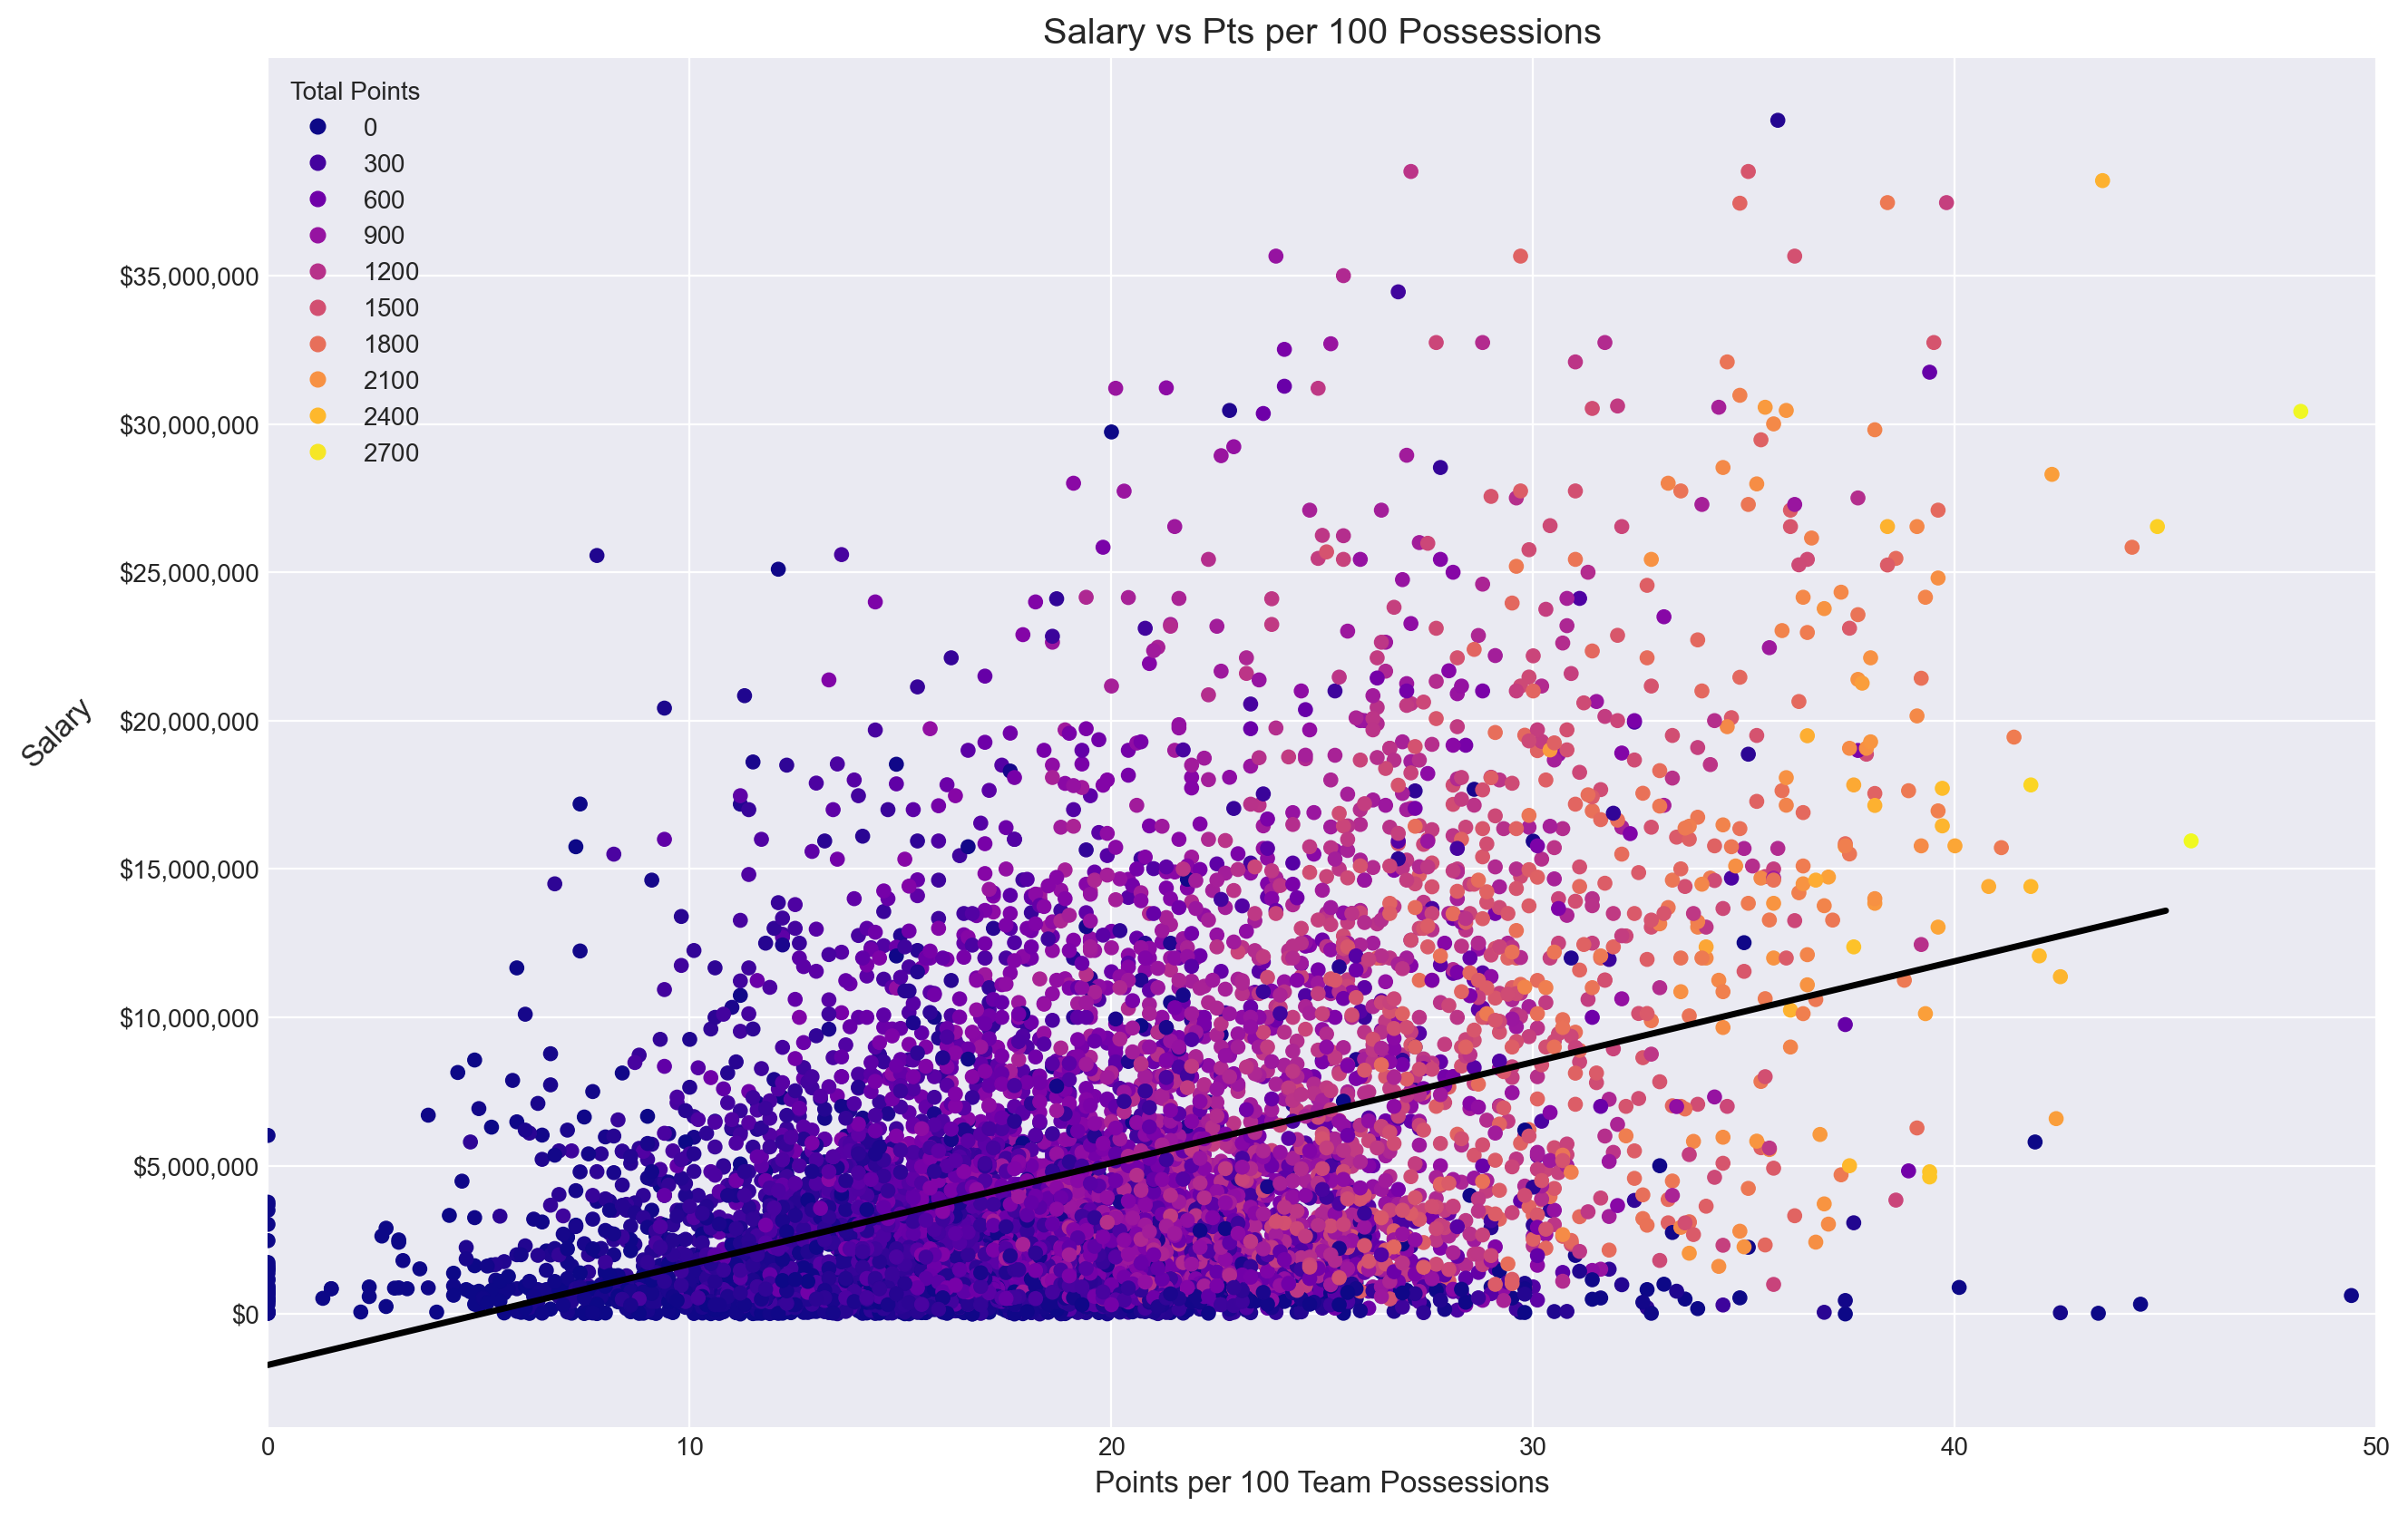

In [168]:
fig, ax = plt.subplots(figsize=(15, 10))

scatter = ax.scatter(copy_df['pts_per_100_poss'], final_df['salary'], c=final_df['pts'], cmap='plasma', s=30)
ax.set(xlabel='Points per 100 Team Possessions',
       ylabel='Salary',
       xlim=(0,50),
       yticks=np.arange(0, 40000000, step=5000000),
       title='Salary vs Pts per 100 Possessions')
ax.legend(*scatter.legend_elements(), title="Total Points")

ax.set_ylabel('Salary', rotation=45)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.labelpad = 20

# Regression Line
b, a = np.polyfit(copy_df['pts_per_100_poss'], final_df['salary'], deg=1)
xseq = np.linspace(0, 45, num=2)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


## Predict a player's salary based on their stats

In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [29]:
max_dict = {}

for i in X.columns:
    max_dict[i] = (X[i].max())

In [30]:
widget_list = []

for i in max_dict.items():
    if isinstance(i[1], pd.Series):
        res = i[1].mean()
    else:
        res = i[1]
    x = widgets.FloatSlider(
        value=res/2,
        min=0,
        max=res,
        step=0.1,
        description=i[0],
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
        )
    widget_list.append(x)

print('Please enter the statistics of the projected player.\nHit the "Predict Salary Button" to find an estimated salary based '+
      'on the given stats.\n\nPlease give TOTAL stats for an entire season')

for i in widget_list:
    display(i)

Please enter the statistics of the projected player.
Hit the "Predict Salary Button" to find an estimated salary based on the given stats.

Please give TOTAL stats for an entire season


FloatSlider(value=1742.5, continuous_update=False, description='mp', max=3485.0, readout_format='.1f')

FloatSlider(value=489.0, continuous_update=False, description='fg', max=978.0, readout_format='.1f')

FloatSlider(value=1086.5, continuous_update=False, description='fga', max=2173.0, readout_format='.1f')

FloatSlider(value=378.0, continuous_update=False, description='ft', max=756.0, readout_format='.1f')

FloatSlider(value=220.0, continuous_update=False, description='orb', max=440.0, readout_format='.1f')

FloatSlider(value=447.0, continuous_update=False, description='drb', max=894.0, readout_format='.1f')

FloatSlider(value=623.5, continuous_update=False, description='trb', max=1247.0, readout_format='.1f')

FloatSlider(value=462.5, continuous_update=False, description='ast', max=925.0, readout_format='.1f')

FloatSlider(value=112.5, continuous_update=False, description='stl', max=225.0, readout_format='.1f')

FloatSlider(value=153.5, continuous_update=False, description='blk', max=307.0, readout_format='.1f')

FloatSlider(value=232.0, continuous_update=False, description='tov', max=464.0, readout_format='.1f')

FloatSlider(value=185.5, continuous_update=False, description='pf', max=371.0, readout_format='.1f')

FloatSlider(value=1416.0, continuous_update=False, description='pts', max=2832.0, readout_format='.1f')

FloatSlider(value=42.5, continuous_update=False, description='g', max=85.0, readout_format='.1f')

FloatSlider(value=41.5, continuous_update=False, description='gs', max=83.0, readout_format='.1f')

FloatSlider(value=150.0, continuous_update=False, description='o_rtg', max=300.0, readout_format='.1f')

FloatSlider(value=60.5, continuous_update=False, description='d_rtg', max=121.0, readout_format='.1f')

FloatSlider(value=66.9, continuous_update=False, description='per', max=133.8, readout_format='.1f')

FloatSlider(value=7.4, continuous_update=False, description='ows', max=14.8, readout_format='.1f')

FloatSlider(value=4.55, continuous_update=False, description='dws', max=9.1, readout_format='.1f')

FloatSlider(value=99.7, continuous_update=False, description='obpm', max=199.4, readout_format='.1f')

FloatSlider(value=21.35, continuous_update=False, description='dbpm', max=42.7, readout_format='.1f')

FloatSlider(value=121.1, continuous_update=False, description='bpm', max=242.2, readout_format='.1f')

FloatSlider(value=5.9, continuous_update=False, description='vorp', max=11.8, readout_format='.1f')

In [31]:
b = widgets.Button(
            description='Predict Salary',
            button_style='info', # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Submit' # (FontAwesome names without the `fa-` prefix)
)

display(b)

def calc_sal(self):
    
    feature_list = []
    for i in widget_list:
        feature_list.append(i.value)
    calc_df = pd.DataFrame(data=[np.array(feature_list)], columns=list(X.columns))
    print(f'Based on the given stats, this player\'s estimated salary is ${round(ideal_model.predict(calc_df)[0]):,}')
    
b.on_click(calc_sal)
    


Button(button_style='info', description='Predict Salary', style=ButtonStyle(), tooltip='Submit')

Based on the given stats, this player's estimated salary is $18,941,013
Based on the given stats, this player's estimated salary is $18,941,013
Based on the given stats, this player's estimated salary is $18,941,013


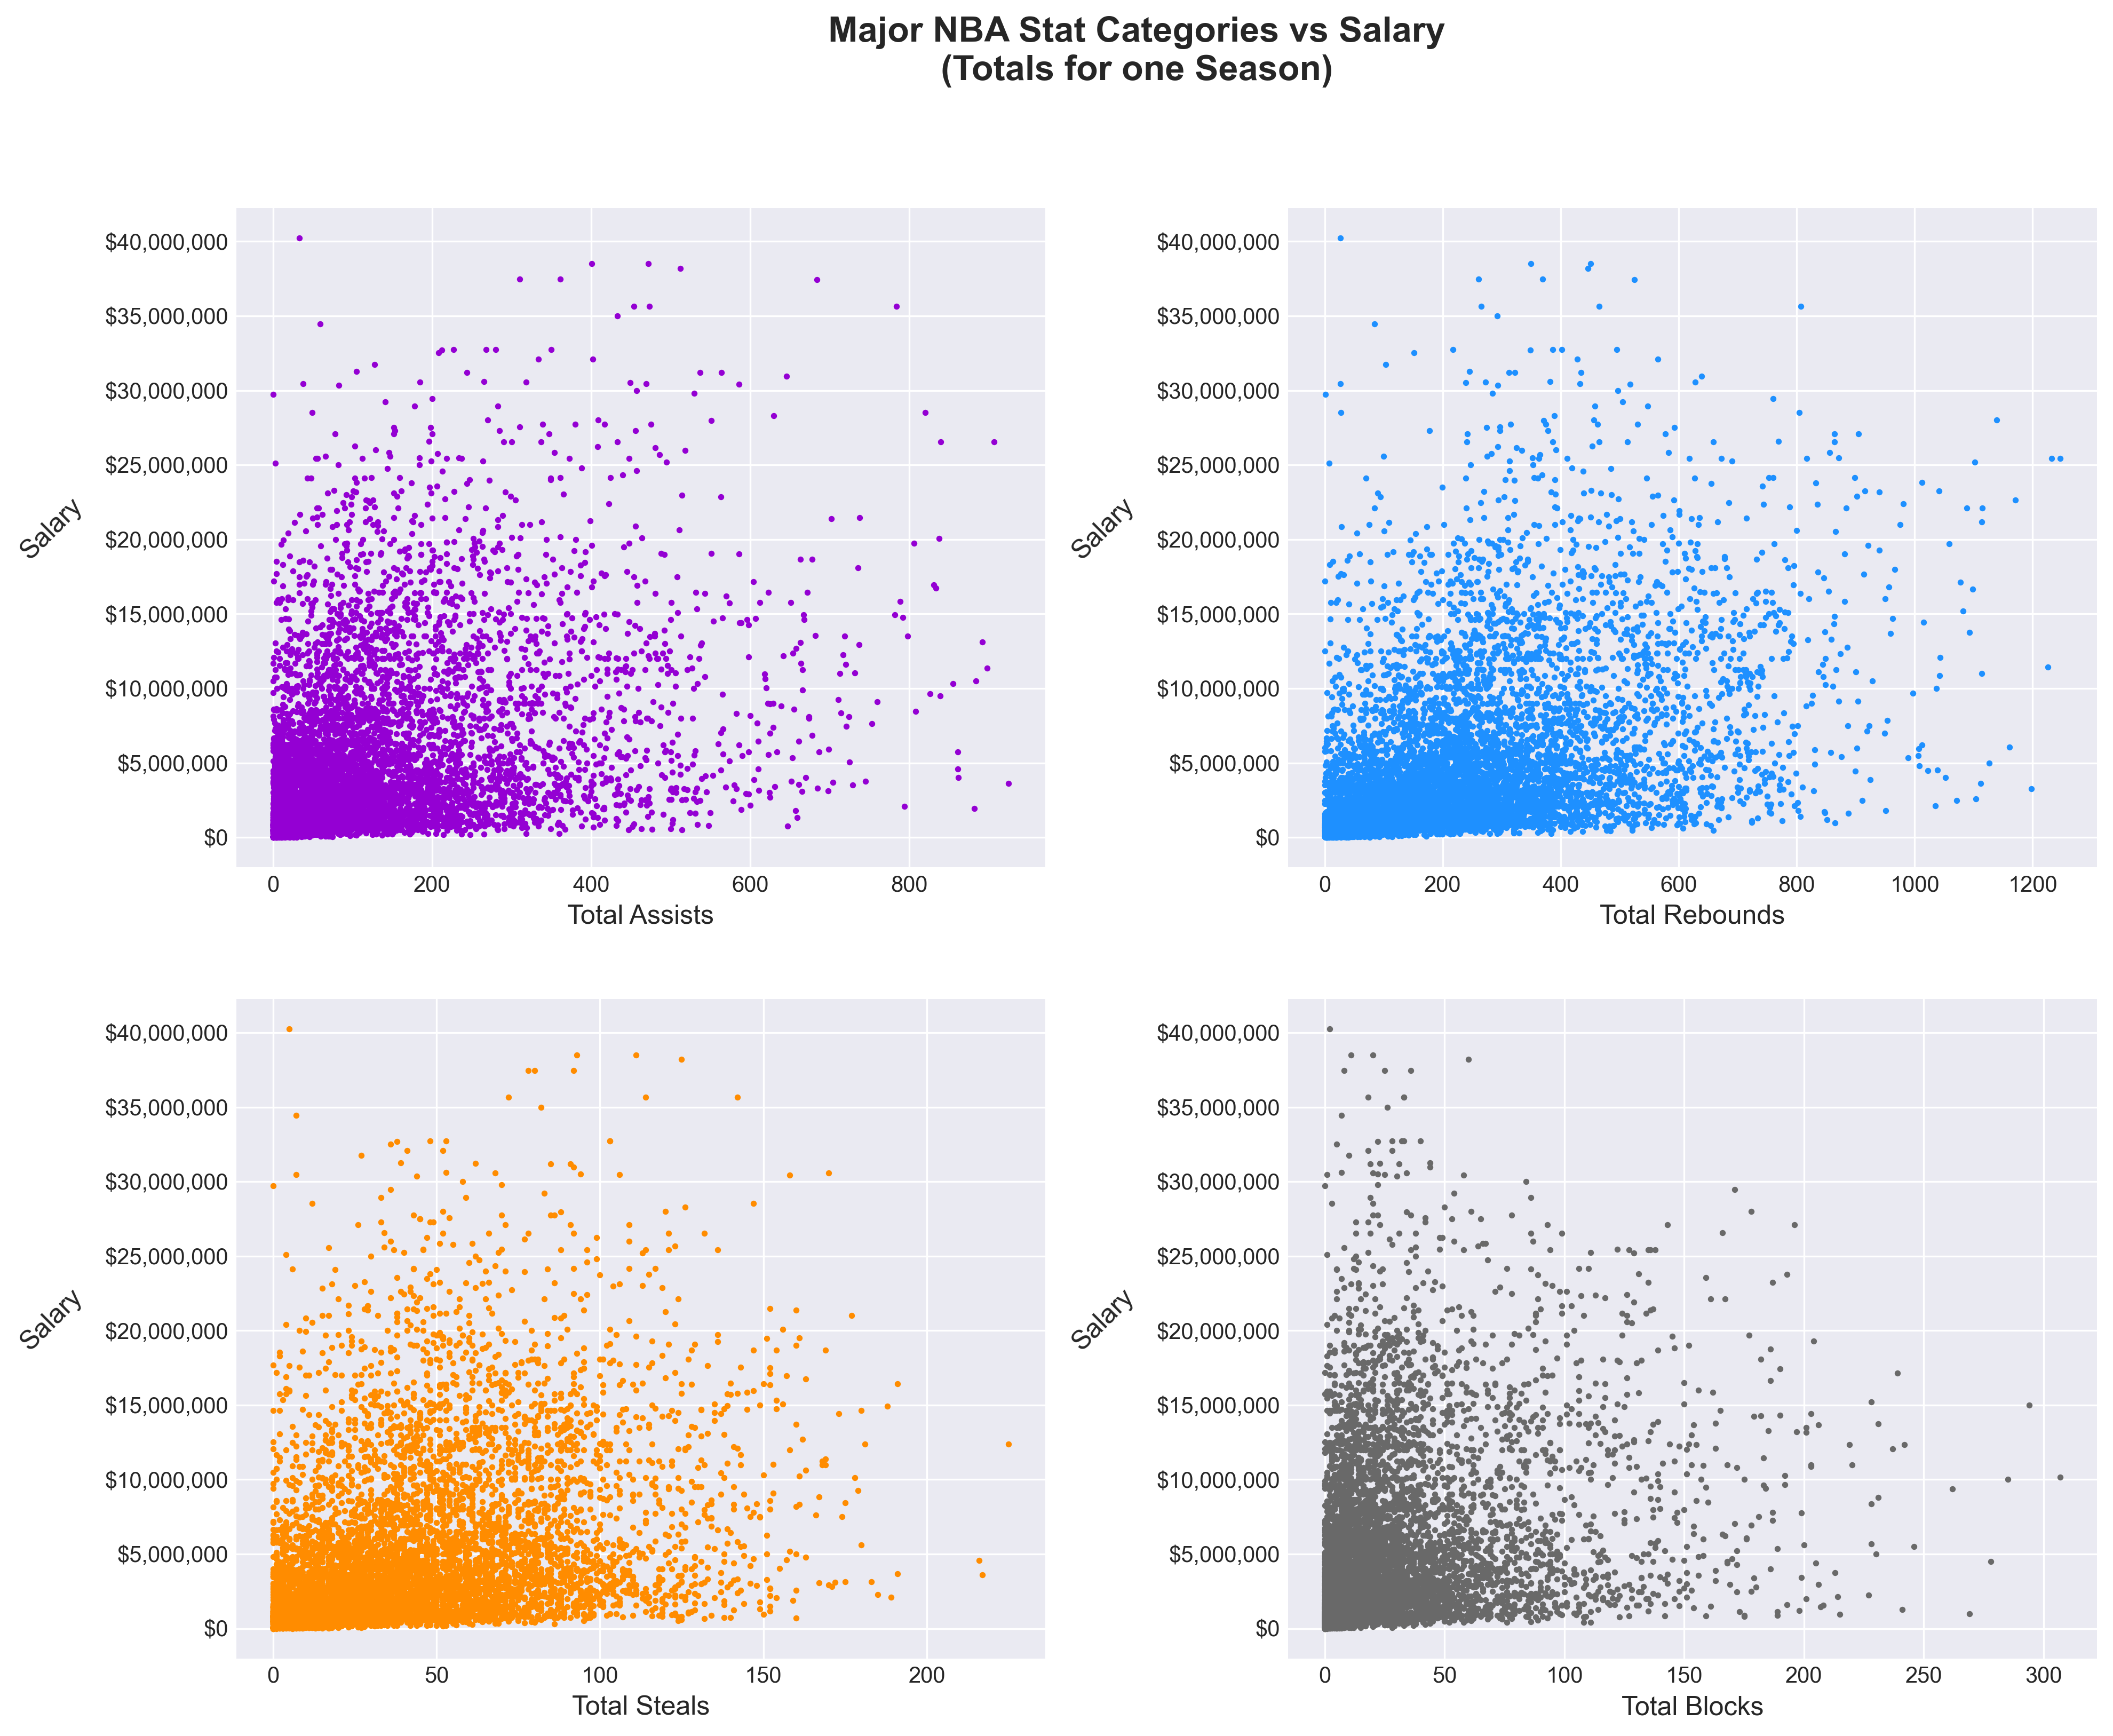

In [159]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(15,12))
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

ax1.scatter(final_df['ast'], final_df['salary'], c = 'darkviolet', s=5, label='Assists')
ax2.scatter(final_df['trb'], final_df['salary'], c= 'dodgerblue', s=5, label='Rebounds')
ax3.scatter(final_df['stl'], final_df['salary'], c= 'darkorange', s=5, label='Steals')
ax4.scatter(final_df['blk'], final_df['salary'], c= 'dimgrey', s=5, label='Blocks')

ax1.set(xlabel='Total Assists',
        ylabel='Salary')
ax2.set(xlabel='Total Rebounds',
        ylabel='Salary')
ax3.set(xlabel='Total Steals',
        ylabel='Salary')
ax4.set(xlabel='Total Blocks',
        ylabel='Salary')

ax1.set_ylabel('Salary', rotation=45)
ax2.set_ylabel('Salary', rotation=45)
ax3.set_ylabel('Salary', rotation=45)
ax4.set_ylabel('Salary', rotation=45)

ax1.yaxis.set_major_formatter('${x:,.0f}')
ax2.yaxis.set_major_formatter('${x:,.0f}')
ax3.yaxis.set_major_formatter('${x:,.0f}')
ax4.yaxis.set_major_formatter('${x:,.0f}')

ax1.yaxis.labelpad = 20
ax2.yaxis.labelpad = 20
ax3.yaxis.labelpad = 20
ax4.yaxis.labelpad = 20

fig.subplots_adjust(wspace=.3)
fig.suptitle("Major NBA Stat Categories vs Salary\n(Totals for one Season)", fontsize=16, fontweight='bold');
